In [1]:
import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:38:39

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
from src import config
from src import models
from src import simulation
from src import analysis
from src import visualization


Feb 01 17:08:11 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.


In [3]:
results = simulation.run_simulation()


Feb 01 17:08:12 NodeManager::prepare_nodes [Info]: 
    Preparing 1057 nodes for simulation.

Feb 01 17:08:12 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1057
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

[  25% ] Model time: 243.0 ms, Real-time factor: 19.3176r: 18.9284

In [5]:
spike_data = results["purkinje_spikes"]
analysis_results = analysis.analyze_spike_data(spike_data)
isis = analysis.get_isi_distribution(spike_data["times"])

voltages_data = results["purkinje_voltages"]
voltage_analysis_results = analysis.analyze_voltage_data(voltages_data)

Overall firing rate: 0.00 Hz
Mean voltage: -57.71 mV
Peak voltage: -54.22 mV


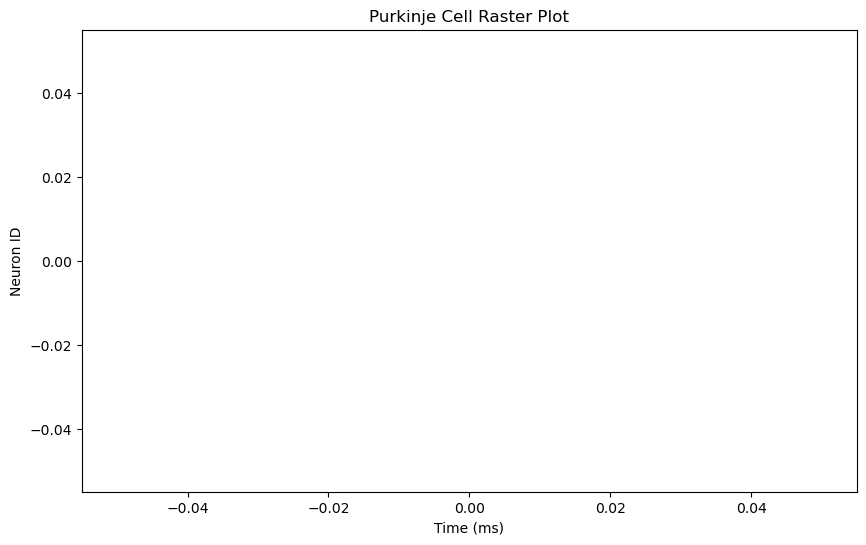

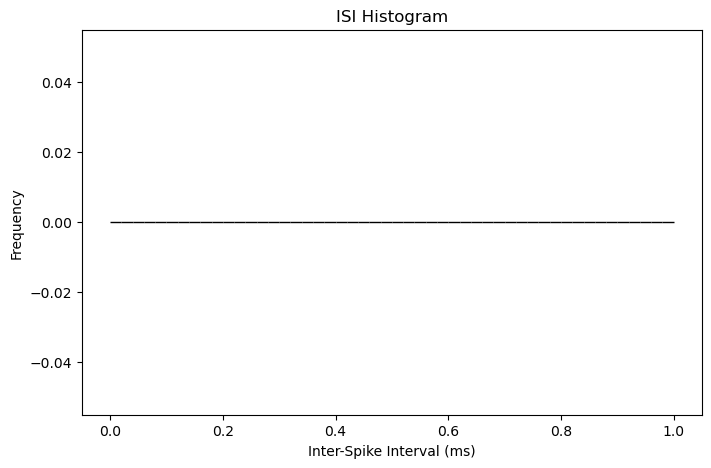

In [6]:
visualization.plot_raster(spike_data, title="Purkinje Cell Raster Plot")
visualization.plot_isi_histogram(isis)

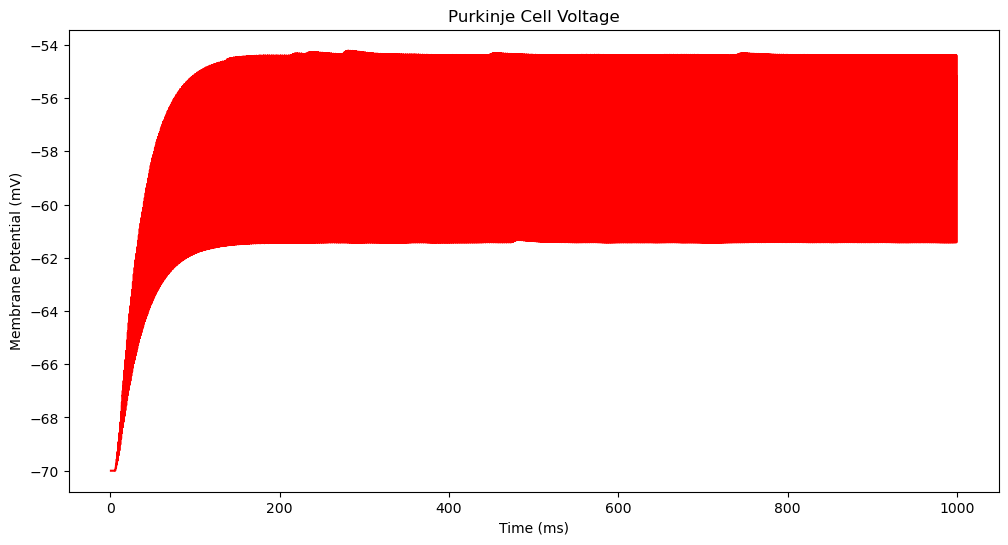

In [7]:
visualization.plot_voltage_trace(voltages_data, title="Purkinje Cell Voltage")